In [6]:
import tensorflow as tf
a= tf.constant('welcome in tensor flow')
print(a.numpy().decode('utf-8'))

welcome in tensor flow


In [8]:
a=tf.constant(10)
b=tf.constant(20)
c=a+b
print(c.numpy())

30


In [9]:
q3_matrix = tf.constant([ [[1, 2],[3, 4], [5, 6]] ], tf.int18)   
print(q3_matrix)   

AttributeError: module 'tensorflow' has no attribute 'int18'

In [10]:
import tensorflow as tf

# Define the matrix with the correct data type (tf.int32)
q3_matrix = tf.constant([ [[1, 2], [3, 4], [5, 6]] ], dtype=tf.int32)

# TensorFlow 2.x allows direct printing of tensors
print(q3_matrix)


tf.Tensor(
[[[1 2]
  [3 4]
  [5 6]]], shape=(1, 3, 2), dtype=int32)


In [13]:
import tensorflow as tf

# Define variables
x = tf.Variable([5], dtype=tf.int32, name="x")
z = tf.Variable([6], dtype=tf.int32, name="z")

# Define constants
c = tf.constant([5], name="constant")
square = tf.constant([2], name="square")

# Define a placeholder for y, here I'm initializing y with some values for the sake of completeness
y = tf.constant([7], dtype=tf.int32, name="y")  # You can change this according to your requirement

# Define the operation
f = tf.multiply(x, y) + tf.pow(x, square) + y + c

# Print the result directly
print(f)


tf.Tensor([72], shape=(1,), dtype=int32)


In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

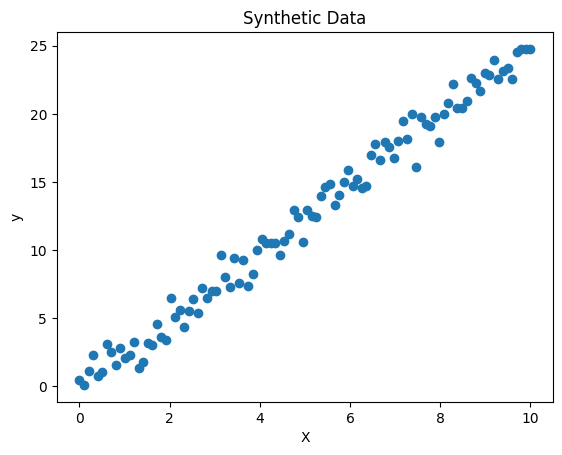

In [16]:
X = np.linspace(0, 10, 100)
y = 2.5 * X + np.random.normal(0, 1, 100)

# Plot the synthetic data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.show()

In [17]:
class LinearRegressionModel(tf.Module):
    def __init__(self):
        # Initialize the parameters (weights and bias)
        self.W = tf.Variable(np.random.randn(), name='weight')
        self.b = tf.Variable(np.random.randn(), name='bias')
        
    def __call__(self, x):
        # Define the linear model y = Wx + b
        return self.W * x + self.b

# Instantiate the model
model = LinearRegressionModel()


In [18]:
# Define the loss function (Mean Squared Error)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer (Stochastic Gradient Descent)
optimizer = tf.optimizers.SGD(learning_rate=0.01)


In [19]:
# Training parameters
epochs = 100
batch_size = 10

# Training loop
for epoch in range(epochs):
    # Shuffle the data
    indices = np.random.permutation(len(X))
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for i in range(0, len(X), batch_size):
        # Get a batch of data
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        with tf.GradientTape() as tape:
            # Forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_batch, y_pred)

        # Compute gradients
        gradients = tape.gradient(loss, [model.W, model.b])

        # Update the parameters
        optimizer.apply_gradients(zip(gradients, [model.W, model.b]))

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.numpy()}')

print(f'Trained Weight: {model.W.numpy()}, Trained Bias: {model.b.numpy()}')


Epoch 10, Loss: 0.8726071119308472
Epoch 20, Loss: 0.7616912722587585
Epoch 30, Loss: 0.8364188075065613
Epoch 40, Loss: 0.9539722204208374
Epoch 50, Loss: 0.3092573285102844
Epoch 60, Loss: 0.6459246873855591
Epoch 70, Loss: 0.2717173993587494
Epoch 80, Loss: 1.114008903503418
Epoch 90, Loss: 0.5585228800773621
Epoch 100, Loss: 0.6469839215278625
Trained Weight: 2.533057451248169, Trained Bias: -0.16987909376621246


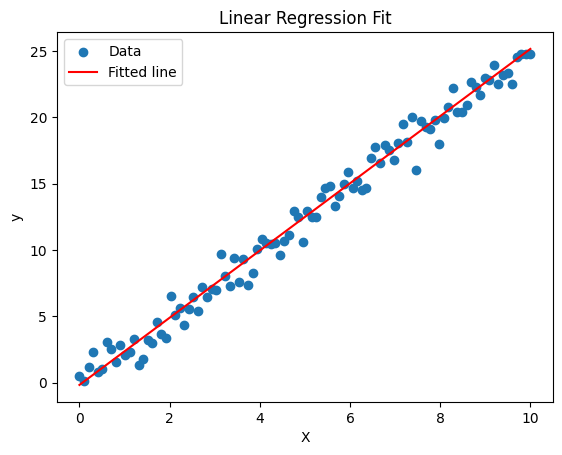

In [20]:
# Make predictions
y_pred = model(X)

# Plot the results
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()
